#### Imports

In [0]:
%matplotlib inline
import networkx as nx
from networkx.algorithms.community.quality import performance, modularity
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import urllib
import sys
import os
from google.colab import drive

#### Give access to Google Drive

In [2]:
savedir = ""
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    savedir = "/content/gdrive/My Drive/colab/"
    try:
        os.mkdir(savedir)
    except FileExistsError:
        print("Directory \"%s\" already exists" % (savedir))
root_path = "/content/gdrive/My Drive/CD-Project-shared/Project/"
sys.path.append(root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Directory "/content/gdrive/My Drive/colab/" already exists


####Import self-made library

In [0]:
import readwrite

tsv_path = root_path + "tsv/"
utsv_path = root_path + "utsv/"

####Construct adjacency matrix and get statistics

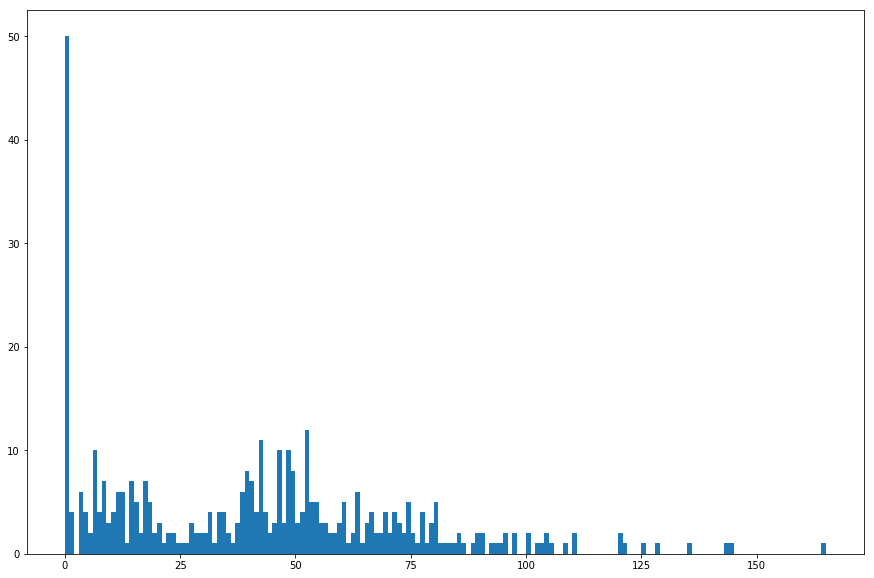

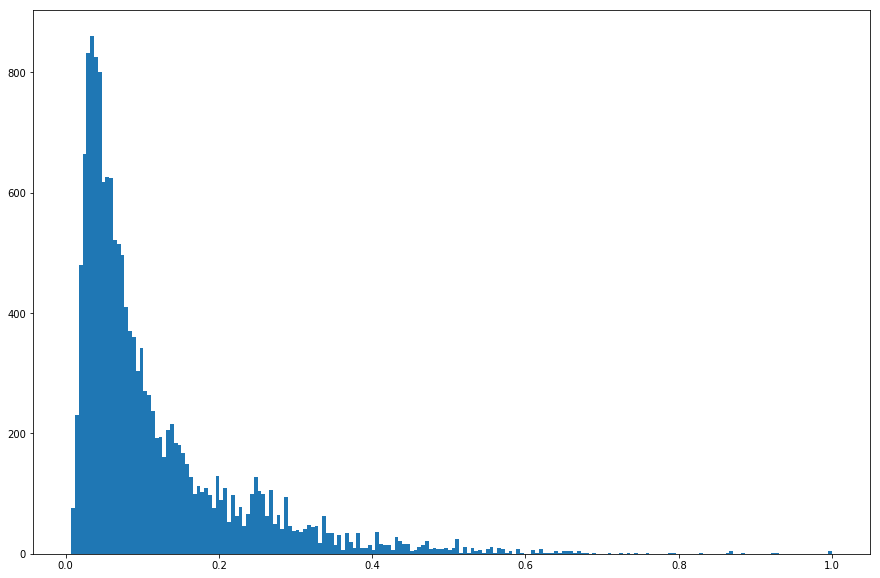

In [4]:
# construct adjacency matrix and label list
data = "project_repo_392_v1"
tsv_file_path = tsv_path + data + ".tsv"
adjmat, labels = readwrite.import_tsv_mat(tsv_file_path, directed=False)

# compute and plot degrees of every node
in_degree = np.count_nonzero(adjmat, axis=0)
out_degree = np.count_nonzero(adjmat, axis=1)
degree = (in_degree + out_degree) / 2
plt.figure(figsize=(15, 10))
_ = plt.hist(degree, bins=int(np.max(degree)))

# plot all the non-zero weights in a histogram
plt.figure(figsize=(15, 10))
_ = plt.hist(adjmat[adjmat != 0].reshape(-1), bins=200)

####Filter the adjacency matrix and export to utsv file

In [5]:
# filter the adjacency matrix
d_threshold = 80
chosen_list = np.nonzero(degree < d_threshold)[0]
filtered_adjmat = adjmat[:, chosen_list][chosen_list, :]
filtered_labels = list(np.array(labels)[chosen_list])

w_threshold = 0.06
filtered_adjmat[filtered_adjmat < w_threshold] = 0
filtered_adjmat[filtered_adjmat > 0] = 1

filename = data + "_" + str(d_threshold) + "_" + str(w_threshold)
utsv_file_path = utsv_path + filename + ".utsv"
readwrite.export_utsv(filtered_adjmat, filtered_labels, utsv_file_path, directed=False, weighted=False)

[Done] export utsv file: /content/gdrive/My Drive/CD-Project-shared/Project/utsv/project_repo_392_v1_80_0.06.utsv
